In [1]:
# digitsData1.py
# sklearnにどんなデータが用意されているかの確認
# データを読み込んで、そのデータを表示する、データの個数と1つ目の画像データと1つ目の数字が何なのかを表示する
import sklearn.datasets

digits = sklearn.datasets.load_digits()

print("データの個数=", len(digits.images))
print("画像データ=", digits.images[0])
print("何の数字か=", digits.target[0])

データの個数= 1797
画像データ= [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
何の数字か= 0


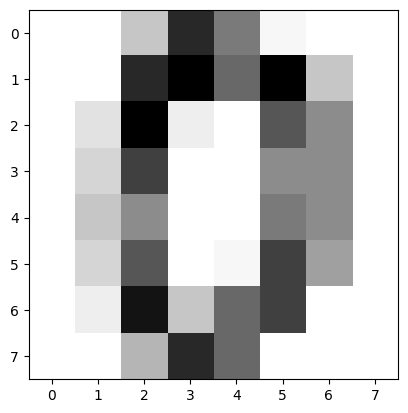

In [2]:
# digitsImage1.py
# 数値リストを画像化
import sklearn.datasets
import matplotlib.pyplot as plt

digits = sklearn.datasets.load_digits()

plt.imshow(digits.images[0], cmap="Greys")  # type: ignore # 数値データをグレーの濃淡画像にする
plt.show()  # 作った画像を表示する

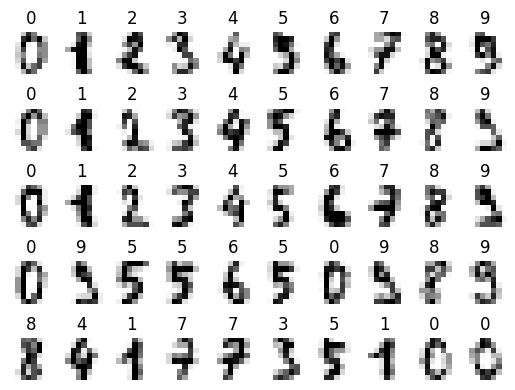

In [3]:
# digitsImage50.py
# 数値リストを画像化
import sklearn.datasets
import matplotlib.pyplot as plt

digits = sklearn.datasets.load_digits()

for i in range(50):
    plt.subplot(5, 10, i + 1)
    plt.axis("off")
    plt.title(digits.target[i])
    plt.imshow(digits.images[i], cmap="Greys")
plt.show()  # 作った画像を表示する

In [5]:
# predictDigits.py
import sklearn.datasets
import sklearn.svm
import PIL.Image
import numpy


# 画像ファイルを数値リストに変換する
def imageToData(filename):
    # 画像を8x8のグレースケールに変換
    grayImage = PIL.Image.open(filename).convert("L")
    grayImage = grayImage.resize((8, 8), PIL.Image.Resampling.LANCZOS)
    # 数値リストに変換
    numImage = numpy.asarray(grayImage, dtype=float)
    numImage = 16 - numpy.floor(17 * numImage / 256)
    numImage = numImage.flatten()

    return numImage


# 数字を予測する
def predictDigits(data):
    # 学習用データを読み込む
    digits = sklearn.datasets.load_digits()
    # 機械学習する
    clf = sklearn.svm.SVC(gamma=0.001)
    clf.fit(digits.data, digits.target)
    # 予測結果を表示する
    n = clf.predict([data])
    print("予測=", n)


# 画像ファイルを数値リストに変換する
data = imageToData("2.png")
# 数字を予測する
predictDigits(data)

予測= [2]


In [6]:
# chino0.py
import tkinter as tk
import tkinter.filedialog as fd
import PIL.Image
import PIL.ImageTk


# 画像ファイルを数値リストに変換する
def imageToData(filename):
    # 画像を8x8のグレースケールに変換
    grayImage = PIL.Image.open(filename).convert("L")
    grayImage = grayImage.resize((8, 8), PIL.Image.Resampling.LANCZOS)
    # その画像を表示する
    dispImage = PIL.ImageTk.PhotoImage(grayImage.resize((300, 300), resample=0))
    imageLabel.configure(image=dispImage)
    imageLabel.image = dispImage


# ファイルダイアログを開く
def openFile():
    fpath = fd.askopenfilename()
    if fpath:
        # 画像ファイルを数値リストに変換する
        data = imageToData(fpath)


# アプリのウィンドウを作る
root = tk.Tk()
root.geometry("400x400")

btn = tk.Button(root, text="ファイルを開く", command=openFile)
imageLabel = tk.Label()

btn.pack()
imageLabel.pack()

tk.mainloop()

In [7]:
# chino.py
import tkinter as tk
import tkinter.filedialog as fd
import PIL.Image
import PIL.ImageTk

# 機械学習で使うモジュール
import sklearn.datasets
import sklearn.svm
import numpy


# 画像ファイルを数値リストに変換する
def imageToData(filename):
    # 画像を8x8のグレースケールに変換
    grayImage = PIL.Image.open(filename).convert("L")
    grayImage = grayImage.resize((8, 8), PIL.Image.Resampling.LANCZOS)
    # その画像を表示する
    dispImage = PIL.ImageTk.PhotoImage(grayImage.resize((300, 300), resample=0))
    imageLabel.configure(image=dispImage)
    imageLabel.image = dispImage
    # 数値リストに変換
    numImage = numpy.asarray(grayImage, dtype=float)
    numImage = 16 - numpy.floor(17 * numImage / 256)
    numImage = numImage.flatten()
    return numImage


# 数字を予測する
def predictDigits(data):
    # 学習用データを読み込む
    digits = sklearn.datasets.load_digits()
    # 機械学習する
    clf = sklearn.svm.SVC(gamma=0.001)
    clf.fit(digits.data, digits.target)
    # 予測結果を表示する
    n = clf.predict([data])
    textLabel.configure(text="この画像は" + str(n) + "です！")


# ファイルダイアログを開く
def openFile():
    fpath = fd.askopenfilename()
    if fpath:
        # 画像ファイルを数値リストに変換する
        data = imageToData(fpath)
        # 数字を予測する
        predictDigits(data)


# アプリのウィンドウを作る
root = tk.Tk()
root.geometry("400x400")

btn = tk.Button(root, text="ファイルを開く", command=openFile)
imageLabel = tk.Label()
btn.pack()
imageLabel.pack()

# 予測結果を表示するラベル
textLabel = tk.Label(text="手書きの数字を認識します！")
textLabel.pack()

tk.mainloop()